# Divergence Theorem

In physics, the divergence theorem, also known as Gauss's theorem or Ostrogradsky's theorem, is a result that relates the flow (that is, flux) of a vector field through a surface to the behavior of the vector field inside the surface.

The divergence theorem can be used to calculate a double integral over the volume V of a three-dimensional domain by turning it into a surface integral over the boundary of the domain. In physics and engineering, the divergence theorem is usually applied in three dimensions. However, it generalizes to any number of dimensions. The theorem is a special case of the more general Stokes' theorem.

The theorem is useful for calculating the flux of a vector field through a closed surface. For example, it can be used to calculate the flux of the velocity field of a fluid through a solid surface, as in the integral form of the Navier–Stokes equations.

The divergence theorem is:

$$\int_{V} \nabla \cdot \mathbf{F} \mathrm{d} V=\oint_{S} \mathbf{F} \cdot \mathrm{d} \mathbf{S}$$

where:

- $V$ is a subset of $\mathbb{R}^{3}$ which is compact and has a piecewise smooth boundary $S$ that is oriented outward;
- $\mathbf{F}$ is a continuously differentiable vector field defined on an open set containing $V$;
- $\mathbf{S}$ is the outward-pointing unit vector field on the boundary $S$ of $V$.
- $\nabla \cdot \mathbf{F}$ is the divergence of $\mathbf{F}$.

# Example 1

Let $V$ be the region in $\mathbb{R}^{3}$ bounded by the sphere $x^{2}+y^{2}+z^{2}=4$ and let $\mathbf{F}(x, y, z)=\left(x^{2}, y^{2}, z^{2}\right) .$ Compute the flux of $\mathbf{F}$ across the boundary of $V$.

## Solution

The boundary of $V$ is the sphere $x^{2}+y^{2}+z^{2}=4 .$ The outward unit normal vector field on the sphere is $\mathbf{S}=\left(\frac{x}{2}, \frac{y}{2}, \frac{z}{2}\right) .$ The divergence of $\mathbf{F}$ is $\nabla \cdot \mathbf{F}=2 x+2 y+2 z .$ By the divergence theorem, the flux of $\mathbf{F}$ across the boundary of $V$ is

$$
\begin{aligned}
\int_{V} \nabla \cdot \mathbf{F} \mathrm{d} V &=\int_{x^{2}+y^{2}+z^{2} \leq 4} (2 x+2 y+2 z) \mathrm{d} V \\
&=\int_{0}^{2 \pi} \int_{0}^{\pi} \int_{0}^{2} (2 r \cos \theta \sin \phi+2 r \sin \theta \sin \phi+2 r \cos \phi )(r^{2} \sin \phi \mathrm{d} r \mathrm{d} \phi \mathrm{d} \theta) \\
&=\int_{0}^{2 \pi} \int_{0}^{\pi} \int_{0}^{2} 2 r^{3} \sin \phi\left(\cos \theta \sin \phi + \sin \theta \sin \phi + \cos \phi \right) \mathrm{d} r \mathrm{d} \phi \mathrm{d} \theta \\
&=\int_{0}^{2 \pi} \int_{0}^{\pi} 8\left(\cos \theta \sin^2 \phi +\sin \theta \sin^2 \phi + \cos \phi \sin \phi \right) \mathrm{d} \phi \mathrm{d} \theta \\
&=\int_{0}^{2 \pi} 8\left(\cos \theta (\frac{\pi}{2}) +\sin \theta (\frac{\pi}{2})  + (0) \right) \mathrm{d} \phi \mathrm{d} \theta \\
&= 4 \pi \int_{0}^{2 \pi} (\cos \theta+\sin \theta) \mathrm{d} \theta \\
& = 0 \\
\end{aligned}
$$

In [29]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Define the vector field
def F(x, y, z):
    return np.array([x**2, y**2, z**2])

# Define the divergence of the vector field
def divF(x, y, z):
    return 2*x + 2*y + 2*z

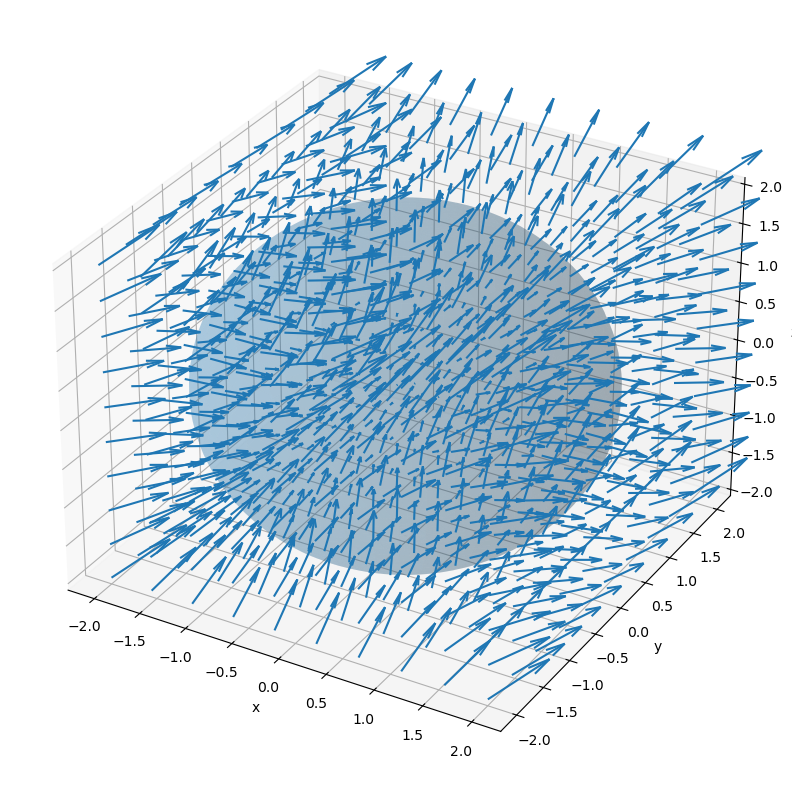

In [30]:
# Plot the vector field and the surface
x, y, z = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
u, v, w = F(x, y, z)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(x, y, z, u, v, w, length=0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Plot the surface
theta = np.linspace(0, 2*np.pi, 100)
phi = np.linspace(0, np.pi, 100)
xs = 2*np.outer(np.cos(theta), np.sin(phi))
ys = 2*np.outer(np.sin(theta), np.sin(phi))
zs = 2*np.outer(np.ones(100), np.cos(phi))
ax.plot_surface(xs, ys, zs, alpha=0.2)

plt.show()

In [44]:
npts = 100

# Compute the flux of F across the surface

flux = 0
for i in range(npts):
    for j in range(npts):
        for k in range(npts):
            theta = 2*np.pi*i/npts
            phi = np.pi*j/npts
            r = 2*k/npts
            #print(theta, phi, r)
            dflux = divF(r*np.cos(theta)*np.sin(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(phi))*r**2*np.sin(phi)*(2/npts)*(np.pi/npts)*(2*np.pi/npts)
            
            flux += dflux
            #print(i,j,k, dflux, flux)

print(flux/np.pi)

2.9955281302157124e-15
